# ***Neurotechnology & BCI Lab***

## **Evoked Potential**

### *Abhishek Amit Raje:BM22BTECH11002*

In [ ]:
import numpy as np
from scipy.io.wavfile import write
from scipy.signal import lfilter
from scipy.signal import butter
import matplotlib.pyplot as plt
import scipy.fftpack as fft
import seaborn as sns
from seaborn import kdeplot
from scipy.stats import norm
import random

### **1.Signal model to simulate ensemble averaging of neural data**

*Mathematical Model* \\
Let the signal $s(t)$ be given by the sum of  discrete time random processes
$x(t)$ and $μ(t)$ where

*   $x(t)$ is the evoked potential due to stimulus
*  $μ(t)$ is the noise in the passive framework

$$
s(t)=f(t)+μ(t)
$$
* The Noise $μ(t=t_0)$ is modelled as $μ_t \sim \mathcal{N}(0,σ_{n}^2)$
* The distribution of the evoked potential is given by the markov chain $f(x_t|x_{t-1})∼N(μ_t,σ^2_{x})$
* The frequency response of $u(t)$  will be
$$
U(e^{jw})=1 ∀ <-w_0<w<w_0
$$
since the response of white noise is uniform in the frequency domain .
* The frequency response of the signal $x(t)$ will be
$$
X(e^{jw})=FFT(x(t))
$$

**Effect of Ensemble Averaging** \\
$$s(t)=x(t)+μ(t)$$

$${\sum_n\frac{s(t)}{N}}={\sum_n\frac{x(t)}{N}+{\sum_n\frac{μ(t)}{N}}}$$
Due to Law of Large Numbers \\
$$
x̄∼\mathcal{N}(μ_t,σ^2_x/N)
$$
$$
μ̄∼\mathcal{N}(0,\sigma_n^2/N)
$$
$\lim{N\to ∞}$
$$
x̄=μ_t \\
ū=0
$$
Hence the stochasticity in the signal is reduced on averaging the distributions


### **2.Use sampling rate of 1000 Hz, 200+ trials of a known signal superimposed with random white noise of specified amplitude**


*White Noise* \\
$$
\mu_t ∼5 *\mathcal{N}(0,1)∼\mathcal{N}(0,25)
$$

$$
Var(aX)=a^2Var(X)
$$


In [ ]:
def generate_white_noise(duration, sample_rate):
    import numpy as np
    noise = 5*np.random.normal(0, 1, int(duration * sample_rate))
    return noise

In [ ]:
def plot_white_noise(noise,duration):
    t=np.linspace(0,duration,len(noise))
    plt.plot(t,noise,color="green",alpha=0.8)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.title('White Noise')
    plt.show()


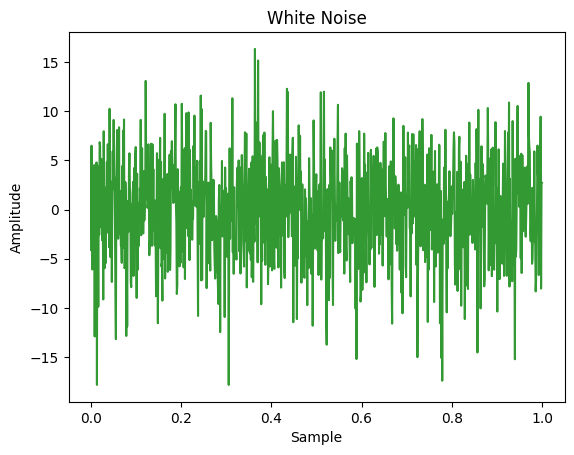

In [ ]:
plot_white_noise(generate_white_noise(1,1000),1)

* Fourier Transfor of white noise is uniformly distributed in the frequnecy domain


In [ ]:
def plot_fourier_transform(signal,sample_rate):
  freq=np.fft.fftfreq(len(signal),1/sample_rate)
  fft_signal=np.abs(np.fft.fft(signal))
  plt.plot(freq,fft_signal,color="red",alpha=0.8)
  plt.xlabel('Frequency')
  plt.ylabel('Amplitude')
  # plt.xlim(-50,50)
  plt.title('Fourier Transform')
  plt.show()
  return freq,fft_signal


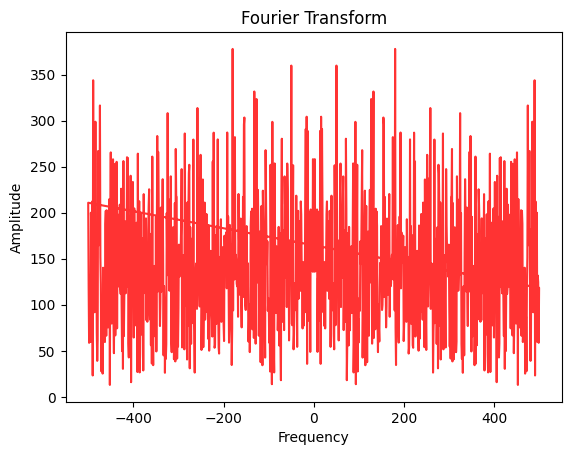

In [ ]:
freq,fft_signal=plot_fourier_transform(generate_white_noise(1,1000),1000)

* Probabilty distribution of the amplitudes of the random noise is gaussian i.e
$$
f_X(x)=\frac{1}{\sigma \sqrt{2\pi}}e^{\frac{{x^2}}{2.σ^2}}
$$

In [ ]:
def plot_distribution(signal_1,signal_2,signal_3):
  sns.kdeplot(signal_1,color="green",shade=True)
  sns.kdeplot(signal_2,color="blue",shade=True)
  sns.kdeplot(signal_3,color="orange",shade=True)
  plt.xlabel('Amplitude')
  plt.ylabel('Density')
  plt.title('Distribution')
  plt.show()

<ipython-input-155-b5ffeda21bdb>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(signal_1,color="green",shade=True)
<ipython-input-155-b5ffeda21bdb>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(signal_2,color="blue",shade=True)
<ipython-input-155-b5ffeda21bdb>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(signal_3,color="orange",shade=True)


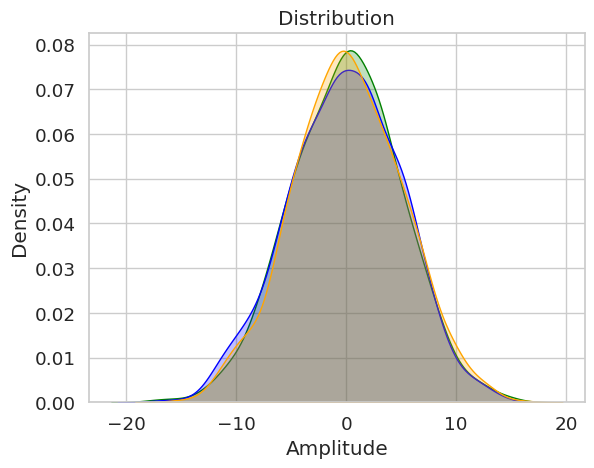

In [ ]:
plot_distribution(generate_white_noise(1,1000),generate_white_noise(1,1000),generate_white_noise(1,1000))

In [ ]:
def plot_linear_chirp(duration, sample_rate, f_min, f_max):
    t = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    signal=5*np.sin(2 * np.pi * (f_min + (f_max - f_min) * t)*t)
    plt.plot(t, signal, color="green", alpha=0.8)
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.title('Linear Chirp')
    plt.show()
    return signal

* Defining Known signal as
$$
x(t)=5\sin(2\pi(f_{min}+(f_{max}-f_{min})t).t)
$$

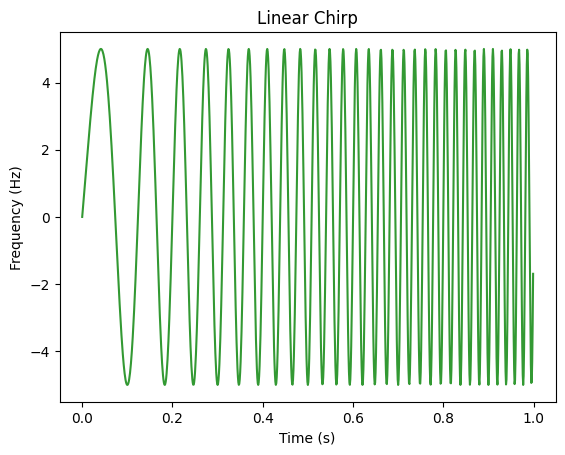

In [ ]:
induced_signal=plot_linear_chirp(duration=1, sample_rate=1000, f_min=5, f_max=30)

In [ ]:
def add_noise_to_signal(signal,generate_white_noise):
  noisy_signal=signal+generate_white_noise(1,1000)
  return noisy_signal

* Creating 200 copies of gaussian white noise added to known linear chirp

In [ ]:
def plot_noisy_signal(signal):
  t=np.linspace(0,1,len(signal))
  plt.plot(t,signal,color="green",alpha=0.8)
  plt.xlabel('Sample')

In [ ]:
def generate_noisy_signals(induced_signal,N):
  noisy_signals=[]
  for i in range(N):
    noisy_signals.append((add_noise_to_signal(induced_signal,generate_white_noise)))
  noisy_signals=np.array(noisy_signals)
  return noisy_signals

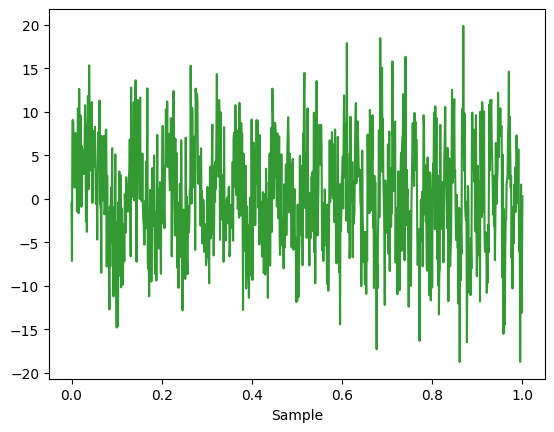

In [ ]:
noisy_signals = generate_noisy_signals(induced_signal,N=200)
plot_noisy_signal(noisy_signals[9])

### **3.Use ensemble averaging to obtain the evoked potential**

* Defining
$$
s̄=∑_n s(t)/N
$$
where $s(t)$ is a random process over $n$


In [ ]:
def average_signals(noisy_signals,N):
  average_signal=np.zeros(len(noisy_signals[0]))
  for i in range(N):
    average_signal+=noisy_signals[i]
  average_signal/=N
  return average_signal


* Effect of Increasing $N$

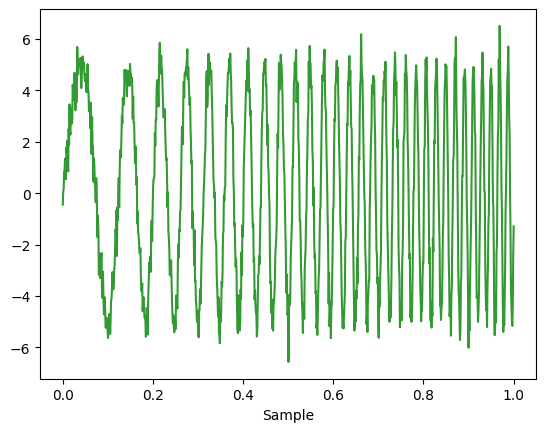

In [ ]:
plot_noisy_signal(average_signals(noisy_signals,100))

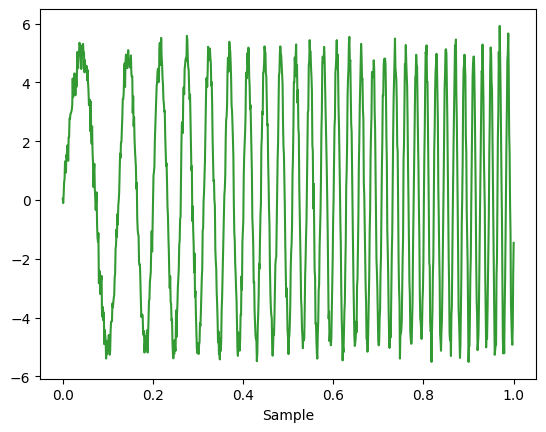

In [ ]:
plot_noisy_signal(average_signals(noisy_signals,200))

* Frequency spectrum has also been recreated

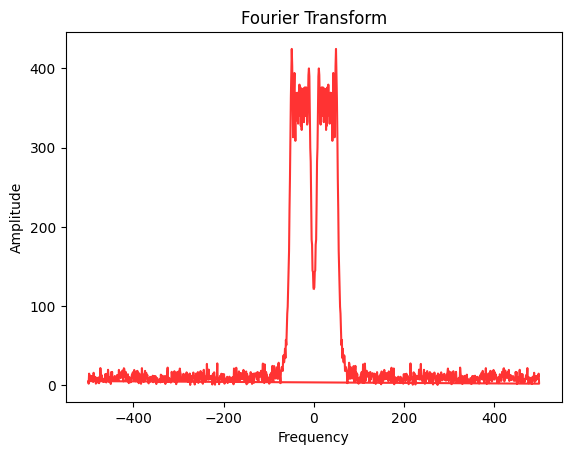

In [ ]:
freq,fft_signal=plot_fourier_transform(average_signals(noisy_signals,200),1000)

### **4.Were you able to retrieve the original signal?**

* Yes due to ensemble averaging the signal has been recoved by a significant extent althought the entire signal in its true form can never be obtained since that would require  $\lim N\to ∞$

### **5.How does the number of epochs affect the quality of the retrieved signal?**

In [ ]:
def RMSE(signal_1,signal_2):
  return np.sqrt(np.mean((signal_1-signal_2)**2))

In [ ]:
def plot_averaging_effect(induced_signal,noisy_signals,average_signals,RMSE,N):
  RMSE_values = []
  for i in range(1, N + 1):
    averaged_signal = average_signals(noisy_signals, i)
    rmse = RMSE(induced_signal, averaged_signal)
    RMSE_values.append(rmse)
  N_values = np.linspace(0, N, N)
  plt.plot(N_values, RMSE_values, color="gold", alpha=0.8)
  plt.plot(N_values,4/np.sqrt(N_values),color="green",alpha=0.8)
  plt.xlabel('N')
  plt.ylabel('RMSE')
  plt.title('RMSE vs N')
  plt.show()

<ipython-input-55-bd75d6bedf7c>:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(N_values,4/np.sqrt(N_values),color="green",alpha=0.8)


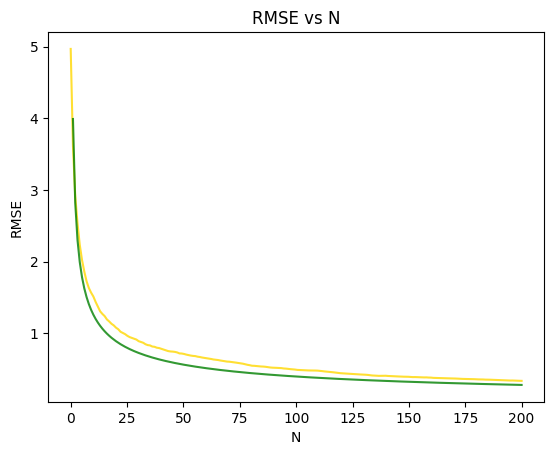

In [ ]:
plot_averaging_effect(induced_signal,noisy_signals,average_signals,RMSE,200)

* As the number of epochs are increase the RMSE defined as
$$
\text{RMSE} =\sqrt{\frac{(x(t)-x̄(t))^2}{N}}
$$
The RMSE decreses as number of epochs $N$ increases by factor of $\sqrt{N}$

This is because the Central limit theorem where $X̄∼\mathcal{N}(μ,\frac{σ^2}{N})$
which implies
$S̄ =\frac{σ}{\sqrt{N}}$

### **6.Increase the noise amplitude and What are the effects**

* Upon increasing the noise the evoked potential can still be obtained although with lesser signal to noise ratio
* The evoked potential was obtained but with greater noise content
* Upon increasing the noise content in the signal the RMSE still varies by $\frac{1}{\sqrt{N}}$ but the error is greator and the curve is shifted in the positive direction implying greator error

### **7.Jitter the signals in each epoch by a known time (randomly sampled between -3 to 3 ms) and show how latency jitter alters the ensemble averaged evoked potential.**

In [ ]:
def jitter_noisy_signal(noisy_signals,sampling,N):
  jittered_signals=[]
  for i in range(N):
    signal=noisy_signals[i]
    shift=random.uniform(-3e-3,3e-3)
    for j in range(len(signal)):
      signal[j]=signal[(j-int((shift*sampling)))%N]
      # print(signal)
    jittered_signals.append(signal)
    # print(jittered_signals)
  jittered_signals=np.array(jittered_signals)
  return jittered_signals


In [ ]:
jittered_signals=(jitter_noisy_signal(noisy_signals,1000,200))

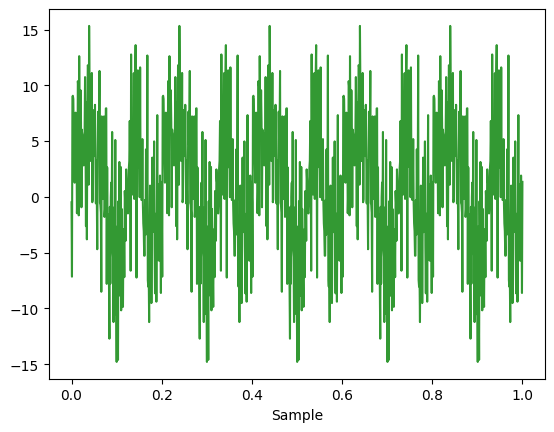

In [ ]:
plot_noisy_signal(jittered_signals[9])

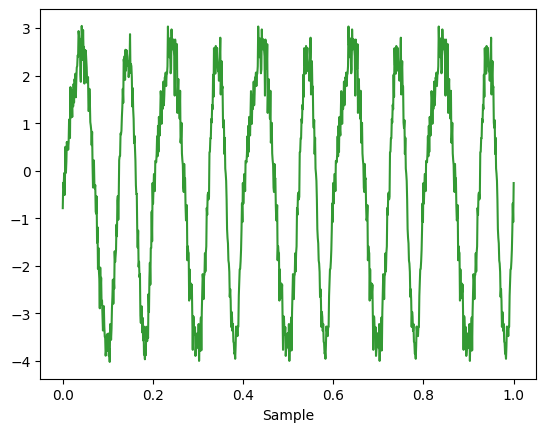

In [ ]:
plot_noisy_signal(average_signals(jittered_signals,200))

<ipython-input-55-bd75d6bedf7c>:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(N_values,4/np.sqrt(N_values),color="green",alpha=0.8)


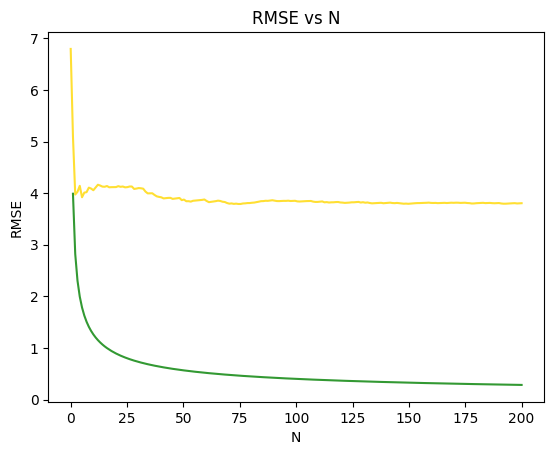

In [ ]:
plot_averaging_effect(induced_signal,jittered_signals,average_signals,RMSE,200)

* Upon jittering the signal the averaged ensemble has a increases  RMSE error.The error saturates at a non-zero value and does to converge to zero as $\lim N \to ∞$

In [ ]:
from scipy.signal import stft, spectrogram
from scipy.signal.windows import dpss

In [ ]:
def compute_stft(signal, sample_rate, nperseg=512):
    f, t, Zxx = stft(signal, fs=sample_rate, nperseg=nperseg)
    return f, t, np.abs(Zxx)

In [ ]:
def plot_stft(f, t, Zxx):
    plt.pcolormesh(t, f, Zxx, shading='gouraud')
    plt.title('STFT Magnitude')
    plt.ylim(0,50)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()


*non-jittered signal STFT*

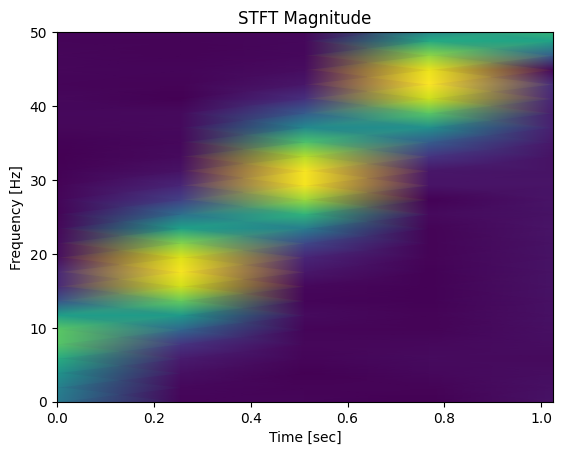

In [ ]:
noisy_signals = generate_noisy_signals(induced_signal,N=200)
signal=average_signals(noisy_signals,200)
sample_rate=1000
f, t, Zxx = compute_stft(signal, sample_rate)
plot_stft(f, t, Zxx)

*Jittered signal STFT*

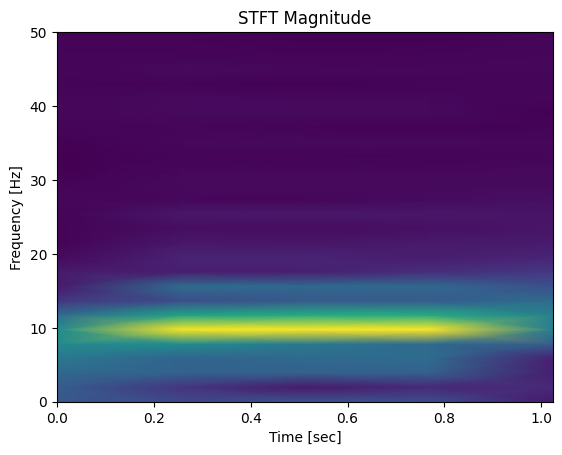

In [ ]:
jittered_signals=(jitter_noisy_signal(noisy_signals,1000,200))
signal=average_signals(jittered_signals,200)
sample_rate=1000
f, t, Zxx = compute_stft(signal, sample_rate)
plot_stft(f, t, Zxx)

* We can also see jittering affects the time-frequency response of the evoked potential

### **Jitter Correction Algorithm**

### **1.epData.txt for this exercise**

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("/content/epData - epData.csv")
evoked_potential_data = np.array(data.iloc[:, 0])

### **2.Sampling frequency = 3200 Hz; First stimulus at 0 ms and inter-stimulus interval is 160 ms**

* Calculating Number of epochs in the Evoked potential

In [ ]:
(len(evoked_potential_data)/3200)/0.160

999.9980468749999

In [ ]:
def plot_evoked_potential(evoked_potential_data,sampling_rate,stimulus_rate):
  t=np.linspace(0,len(evoked_potential_data)/sampling_rate,len(evoked_potential_data))
  stimulus=np.zeros(len(evoked_potential_data))
  for i in range(0,len(evoked_potential_data),int(stimulus_rate*sampling_rate)):
    stimulus[i]=1
  # plt.xlim(0,0.16)
  plt.plot(t,evoked_potential_data,color="orange",alpha=0.8)
  plt.plot(t,stimulus,color="black",alpha=0.8)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title('Evoked Potential')
  plt.plot()

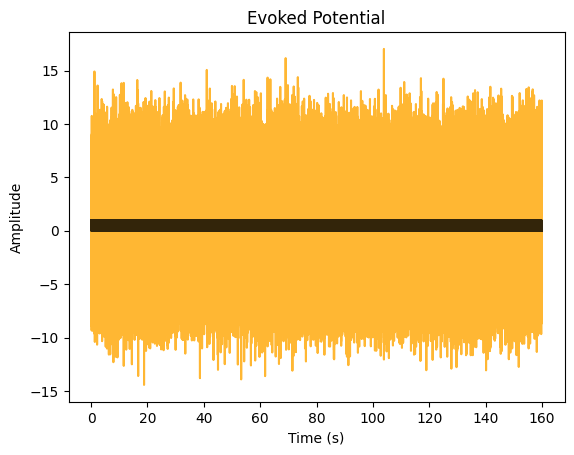

In [ ]:
sampling_rate=3200
stimulus_rate=0.160
plot_evoked_potential(evoked_potential_data,sampling_rate,stimulus_rate)

### **3.Epoch the data and plot them and comment**

*a)Pattern in Line Plot?*

In [ ]:
samples_per_segment = int(0.160 * sampling_rate)
split_evoked_potential = np.array_split(evoked_potential_data, len(evoked_potential_data) // samples_per_segment)


In [ ]:
remainder = len(evoked_potential_data) % samples_per_segment
if remainder:
    split_evoked_potential.append(evoked_potential_data[-remainder:])

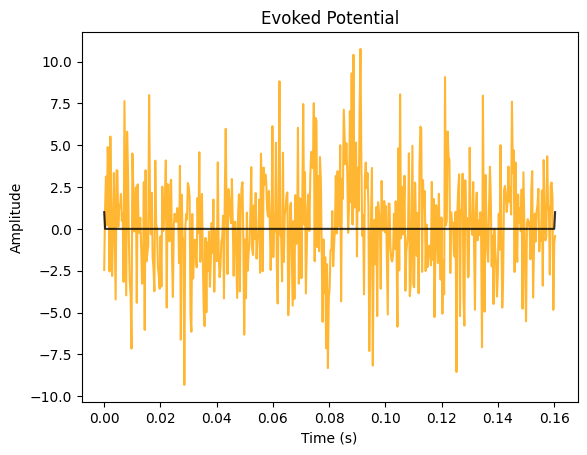

In [ ]:
plot_evoked_potential(split_evoked_potential[1],sampling_rate,stimulus_rate)

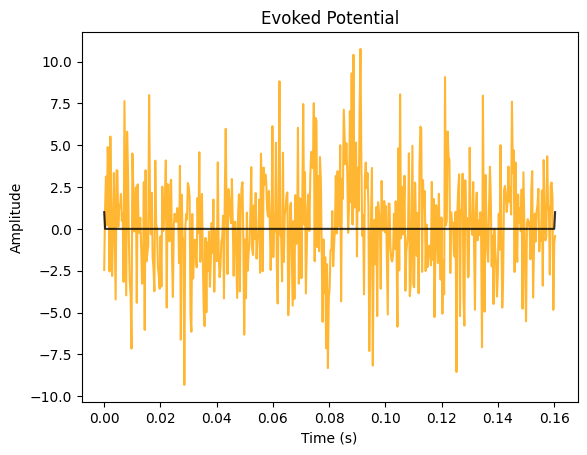

In [ ]:
plot_evoked_potential(split_evoked_potential[1],sampling_rate,stimulus_rate)

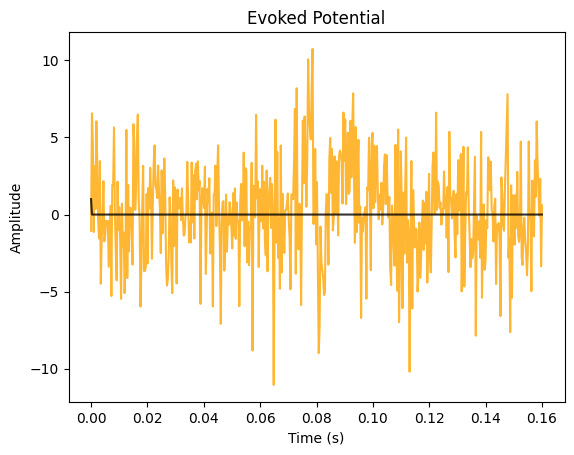

In [ ]:
plot_evoked_potential(split_evoked_potential[800],sampling_rate,stimulus_rate)

* Upon Observing the line plot there seems to be a slight trace of neural firing activity though it is not distinct and noisy

*b) MN Image Plot*

In [ ]:
def plot_split_evoked_potential_image(split_evoked_potential, sampling_rate):
  max_len = max(len(segment) for segment in split_evoked_potential)
  padded_segments = np.array([
      np.pad(segment, (0, max_len - len(segment)), mode='constant', constant_values=0)
      for segment in split_evoked_potential
  ], dtype=np.float64)

  num_epochs, epoch_length = padded_segments.shape
  time_points = np.linspace(0, epoch_length / sampling_rate, epoch_length)

  plt.figure(figsize=(10, 6))
  plt.imshow(padded_segments, aspect='auto', cmap='viridis', origin='lower',
            extent=[time_points[0], time_points[-1], 0, num_epochs])
  plt.colorbar(label='Amplitude')
  plt.xlabel('Time (s)')
  plt.ylabel('Epoch Number')
  plt.title('Split Evoked Potential - Image Plot')
  plt.show()


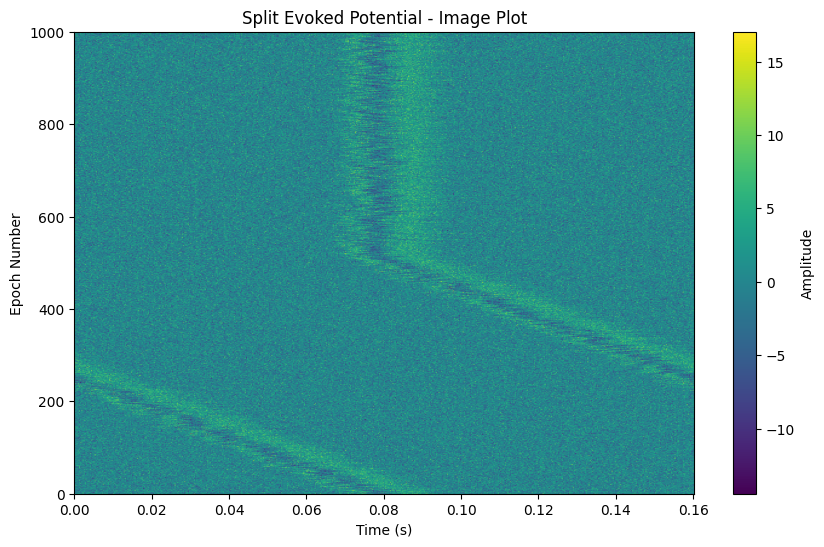

In [ ]:
plot_split_evoked_potential_image(split_evoked_potential, sampling_rate)

* From the Image plot as well it can be seen that the signal first decreases then increases and decreases again like a neural spike

*c) Raw Traces of Epoch signal*

In [ ]:
def average_signal(split_evoked_potential, N):
  max_len = max(len(segment) for segment in split_evoked_potential[:N])
  average_sig = np.zeros(max_len)

  for i in range(N):
    segment = split_evoked_potential[i]
    if segment.ndim > 1:
      segment = segment.flatten()
    segment = np.pad(segment, (0, max_len - len(segment)), 'constant')
    average_sig += segment

  average_sig /= N
  return average_sig

In [ ]:
average_sig=average_signal(split_evoked_potential,999)

In [ ]:
def plot_signal(average_signal,signal):
  t=np.linspace(0,len(average_signal)/sampling_rate,len(average_signal))
  plt.plot(t,signal,color="purple",alpha=0.8)
  plt.plot(t,average_signal,color="orange",alpha=0.8)
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.title('Evoked Potential')
  plt.plot()

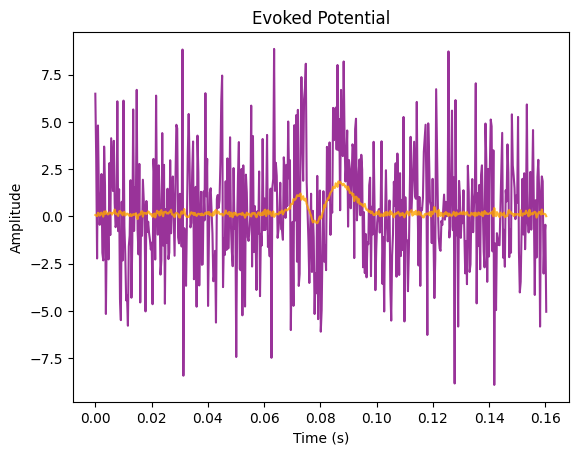

In [ ]:
plot_signal(average_sig,split_evoked_potential[0])

* From the averaged and noisy signal the comparison about neural potential can be made

### **4.How does the quality of the ensemble average vary with the number of epochs?**

<ipython-input-55-bd75d6bedf7c>:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(N_values,4/np.sqrt(N_values),color="green",alpha=0.8)


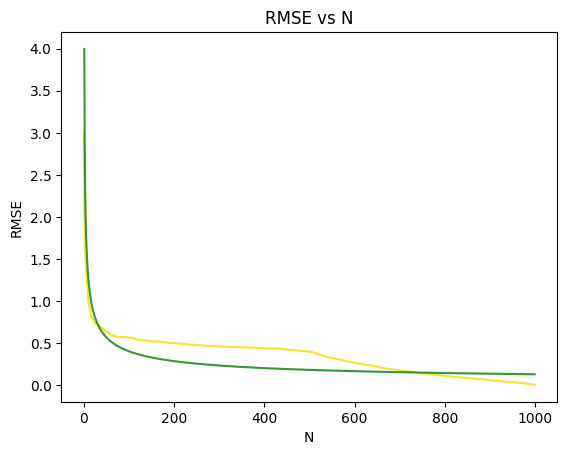

In [ ]:
plot_averaging_effect(average_sig,split_evoked_potential,average_signal,RMSE,999)

* Here also we see that the error varies with $\frac{1}{\sqrt{N}}$

### **5.Now plot the probability density functions of the original signal epochs, noise epochs,combined epochs (signal+noise) and the ensemble averaged signals. What is the pattern you see?**

In [ ]:
def plot_pdf(data):
  sns.kdeplot(data,color="gold",alpha=0.8,shade=True)
  plt.xlabel('Amplitude')
  plt.ylabel('Density')
  plt.title('Distribution')
  plt.show()

In [ ]:
noise_data=[]
N=10
for i in range(N):
  noise=average_sig-split_evoked_potential[i]
  noise_data.append(noise)
noise_data=(np.array(noise_data)).flatten()

In [ ]:
noise_data

array([-6.41541908, -3.04142553,  2.23910328, ...,  5.49509469,
        0.19789112, -4.98985893])

**Noise Distribution**

<ipython-input-157-e6a948c12aa3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,color="gold",alpha=0.8,shade=True)


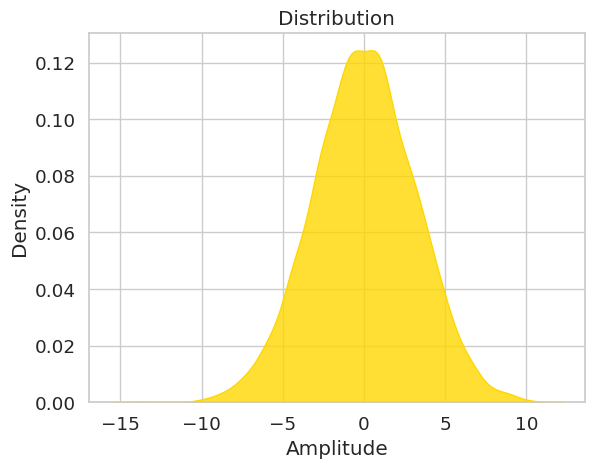

In [ ]:
plot_pdf(noise_data)

**Signal Distribution**

<ipython-input-157-e6a948c12aa3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,color="gold",alpha=0.8,shade=True)


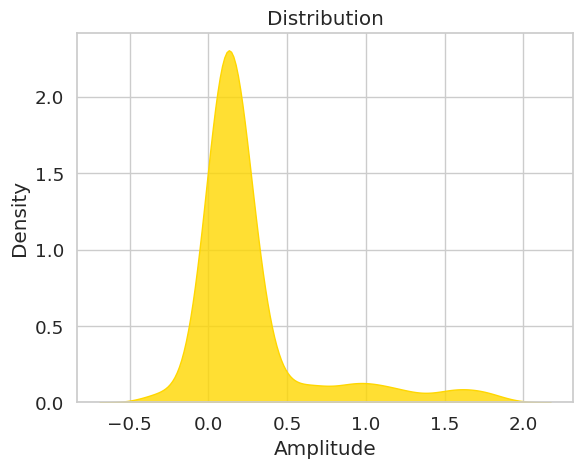

In [ ]:
plot_pdf(average_sig)

**Orignal Evoked Potential Distribtion**

<ipython-input-157-e6a948c12aa3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,color="gold",alpha=0.8,shade=True)


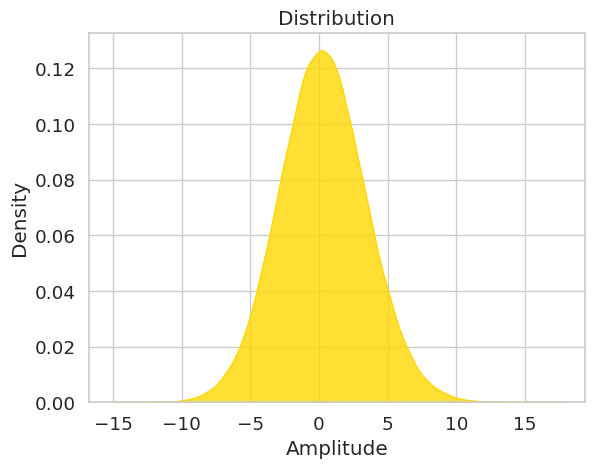

In [ ]:
plot_pdf(evoked_potential_data)

*Observations*

1.   The noise signal has a zero mean with large varaiance
2.   The evoked has a non zero mean with a kind of multi-modal distribution showing the determinitic properties of the evoked potential

